# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Вызовем все необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Сохраним полученные данные в новый датафрейм df, и выведем на экран общюю информацию для ознакомления.

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

Одна колонка и 23699 строк. Видимо в данных неизвестный разделитель. Выведем на экран первые 5 строк чтобы определить разделитель.

In [3]:
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


В роли разделителя у нас  `\t`. Внесем необходимые изменения в `df` для корректного отображения таблицы. И выведем информацию.

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы имеем 22 колонки, 23699 строк. Данные представлены в виде:


* булевы значения `bool` - 2
* дробные числа 90 `float64` - 14
* целочисленные значения `int64` - 3
* значения `object` - 3

Согласно описания:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Выведем на экран 10 строк нашего датафрейма.

In [5]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Уже по первым 10 строкам видно, что в данных множество пропусков. В колонке `first_day_exposition` данные указаны в виде `object` хотя и хранят дату и время публикации. В колонке `last_price` цена сохранена в в виде вещественного числа, нужно вернуть целочисленное (вряд ли люди уточняют в обьявлении цену за недвижимость до копеек). В колонке `floors_total` тоже указаны вещественные числа, количество этажей целое число (по крайней мере в готовых домах). Количество балконов нужно вернуть к целочисленным значениям. То же касательно и растояния до аэропорта, центра города, парков и их количества, водоемов и количества дней публикации. 

Прежде чем преступить к анализу, нужно превести данные к порядку. 

## Предобработка данных

### Пропущеные значения

Для начала посмотрим на пропущенные значения.

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пойдем по порядку:

* `floors_total` — всего этажей в доме, заменить средним значением не получится, пропусков всего 86.
* `living_area` — жилая площадь в квадратных метрах (м²), заменить пропуски пока не чем.
* `kitchen_area` — площадь кухни в квадратных метрах (м²), в разных квартирах - разная площадь кухонь, оставим пропуски без изменений.
* `locality_name` — название населённого пункта, востановить название населенного пункта по имеющимся данным у нас не получится. Да и пропусков в этом столбце всего 49.
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м), и `cityCenters_nearest` — расстояние до центра города (м). В Санкт-Петербурге один центр и один аэропорт(Пулково), но уже по первым срокам датафрейма видно что пропуски у объектов находящихся в Ленинградской Области. Не понятно до какого центра города, в случае с Янино или Мурино - центром города будет центр Всеволожска, а не Санкт-Петербурга. Оставим пропуски.
* `parks_around3000` — число парков в радиусе 3 км, и `parks_nearest` — расстояние до ближайшего парка (м). В некоторых случаях парка нет по близости, а в некоторых даже на расстоянии 3км, но наличие и отстствие данных объектов ифраструктуры может существенно влиять на стоимость недвижимости. Оставим пропуски.
* `ponds_around3000` — число водоёмов в радиусе 3 км, `ponds_nearest` — расстояние до ближайшего водоёма (м), то же самое что и с парками. Оставим пропуски.
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия), скорее всего объявление не было снято с публикации на момент получения данных.

In [7]:
df['locality_name'] = df['locality_name'].fillna('неизвестно') # заменим пропуски в названиях на неизвестно

Столбцу last_price вернем целочисленное значение(в случае с недвижимостью цену в объявлении указывают без копеек):

In [8]:
df['last_price'] = df['last_price'].astype('int')

* высота потолков 9195 пропусков. Высота потолков в квартирах стандартно от 2.4м. до 3м.(в некоторых случаях), в среднем 2.5-2.7м. Заменим пропуски на медианное значение по столбцу.

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()).round(1)

In [10]:
df['ceiling_height'].isna().sum()

0

Отлично. Пропусков нет.

* `is_apartment` — апартаменты, должен быть булев тип, а сейчас `object`. изменим тип данных и заменим пропуски на `False`.

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool')

Проверим:

In [12]:
df['is_apartment'].dtype

dtype('bool')

In [13]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Отлично. Тип булев, пропусков нет.

* `balcony` — число балконов, 11519 пропусков. Бывают квартиры и без болконов(у меня без), среднее значение тут вряд ли подойдет. Если человек не указал наличие балкона - скорее всего его нет, заменим пропущенные значения на `0` и вернем целочисленное значение столбцу(мало кто может похвастаться половиной балкона или девятью и тремя четвертями).

In [14]:
df['balcony'] = df['balcony'].fillna(0).astype('int')

In [15]:
df['balcony'].dtype

dtype('int64')

In [16]:
df['balcony'].isna().sum()

0

Значение верное пропусков нет.

In [17]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

## Расчёты и добавление результатов в таблицу

### Расчитаем цену квадратного метра

Возьмем последнюю стоимость и поделим на общюю площадь. Вернем столбцу целочисленное значение.

In [18]:
df['price_per_sqme'] = (df['last_price'] / df['total_area']).astype('int')

Проверим наш столбец:

In [19]:
df['price_per_sqme'].head()

0    120370
1     82920
2     92785
3    408176
4    100000
Name: price_per_sqme, dtype: int64

В некоторых случаях цена доходит до полумиллиона рублей за квадратный метр.

###  Добавим столбцы день недели, месяц и год объявления

Приведем столбец `first_day_exposition` к правильному формату и вернем из него день недели публикации объявления:

In [20]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')
df['weekday'] = df['first_day_exposition'].dt.weekday

Создадим столбец `month` с порядковым номером месяца публикации:

In [21]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

Создадим столбец `year` с годом публикации:

In [22]:
df['year'] = df['first_day_exposition'].dt.isocalendar().year

Проверим наш обновленный датафрейм:

In [23]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqme,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.6,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.6,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018


### Разделим квартиры по этажности

где:

* `первый` - на первом этаже
* `последний` - на последнем этаже
* `другой` - все остальный этажи

In [24]:
def flat_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == floors_total:
        return 'последний'
    if floor == df['floor'].min():
        return 'первый'
    return 'другой'
df['flat_floor'] = df.apply(flat_floor, axis=1)
df['flat_floor'].value_counts()

другой       17446
последний     3361
первый        2892
Name: flat_floor, dtype: int64

### Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [25]:
df['living_ratio'] = (df['living_area'] / df['total_area']).round(2) # отношение жилой площади к общей

In [26]:
df['living_ratio'].mean()

0.5647449073224445

In [27]:
df['kitchen_ratio'] = (df['kitchen_area'] / df['total_area']).round(2) # отношение площади кухни к общей

In [28]:
df['kitchen_ratio'].mean()

0.18732132019980394

Видно что жилая площадь занимает порядка 57% от общей, что же касается кухни, то в среднем  её площадь не привышает 20% от общей.

## Исследовательский анализ данных

### Постриоим диаграммы для следующих параметров: общая площадь,  цена,  колличество комнат и высота потолков.

Для начала нам нужно узнать минимальную площадь недвижимости, чтобы построитьгистограмму не от ноля.

In [29]:
df['total_area'].min()

12.0

Построим гистограмму общей площади недвижимости:

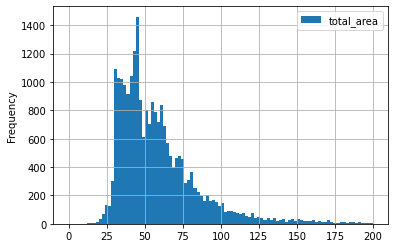

In [30]:
#df['total_area'].hist(bins=20, range=(12, 900));
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, range = (0,200));

Похоже на распредиление Пуассона. Мы видим что больше всего объявлений о продаже квартир площадью около 50 квадратных метров.

Далее цена:

In [31]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Стоимость большинства объектов недвижимости не превышает 68 миллионов рублей, возьмем эту цифру как правую границу гистограммы (брать 763 миллиона нет смысла, так как на гистограмме это не отобразится).

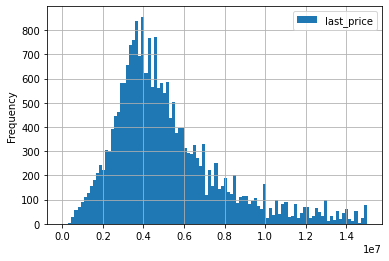

In [32]:
#df['last_price'].hist(bins=100, range=(0, 68*1e6));
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000));

Разброс цен велик, от стоимости недвижимости в 12190 рублей и до астрономических цен более полумиллиарда. Если отсечь значения свыше 15 миллионов будет похоже на распредиление Гауса, но пока больше похоже на распредиление Пуассона.

Количество комнат:

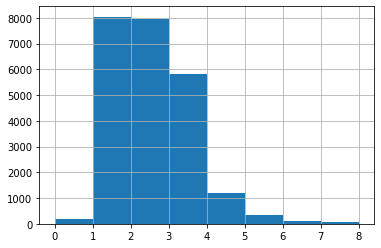

In [33]:
df['rooms'].hist(bins=8, range=(0, 8));

Тут мы видим что в продаже больше сего 1 и 2 комнатных квартир. Далее по убыванию 3, 4 и т.п.. Но встречаются и квартиры с числом комнат 0- это либо ошибка, либо студии и квартиры с открытой планировкой.

Высота потолков:

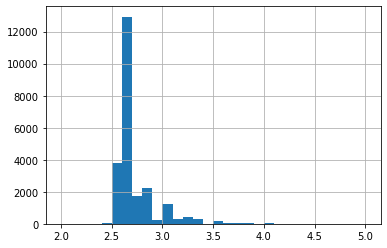

In [34]:
df['ceiling_height'].hist(bins = 30, range = (2,5)); # если закоментировать результат замены пропусков картина не меняется.

Как и ожидалось высота потолка в районе 2.7 метра стандартна для большенства квартир. Так же похоже на распредиление Пуассона.

### Изучим время продажи квартир

In [35]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

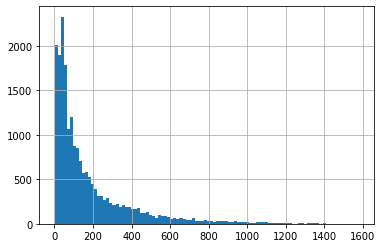

In [36]:
df['days_exposition'].hist(bins=100);

Мы видим распределение Пуассона. И некоторые аномалии. Так на графике видно пики в районе 10, 50 и 100 дней. Отсеим значения более 250 дней (так как 75% обьявлений сняты с публикации в пределах 232 дней) чтобы посмотреть на эти пики и изучить их по подробнее.

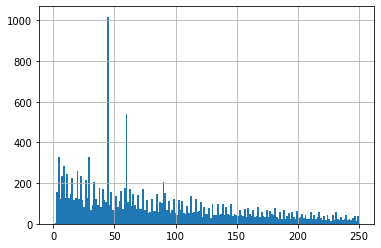

In [37]:
df['days_exposition'].hist(bins=180, range = (1,250));

In [38]:
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

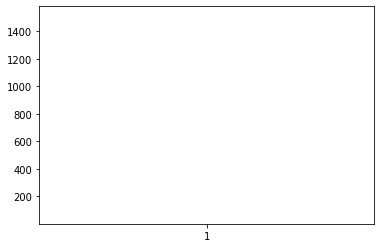

In [39]:
plt.boxplot(df['days_exposition'])
plt.ylim(1,1580);

Аномальных пиков оказалось чуть больше, они соответствуют 7, 30, 45, 60 и 90 дней. В данном случае не понятно появление аномалий, но прослеживается некоторая последовательность (неделя, месяц, полтора месяца, два месяца и три месяца). Нужно посмотреть что на это скажут астрологи, может при продаже недвижимости, этим срокам благоприятствуют планеты или звезды. Но скорее всего дело в чем-то другом. Нужно посмотреть на среднее и медиану.

Конечно медиана близка к значению 90 дней но всё же не ровна. Нужно искать дальше, слишком много значений, просто так удалять не выяснив причину мы их не можем.

Исходя из полученных данных быстрыми можно считать продажи завершенные менее чем за 45 дней, те продажи что длятся более 232 дней можно считать необычно долгими. Те же продажи что лежат в промежутке от 45 до 232 дней можно считать нормальными.

### Редкие и выбивающиеся значения.

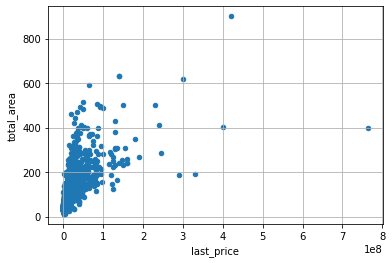

In [40]:
df.plot(x='last_price', y='total_area', kind='scatter', grid=True );

Мы видим за пределами 400 квадратных метров и 200 миллионами рублей расположены аномальные и редкие квартиры. не все из них ошибки, но значения на столько велики, что существенно влияют на все показатели. Нужно посмотреть на отношение цены к другим показателям.  

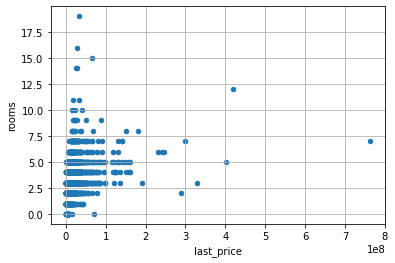

In [41]:
df.plot(x='last_price', y='rooms', kind='scatter', grid=True );

Такая же ситуация наблюдается и с квартирами свыше 10 комнат.

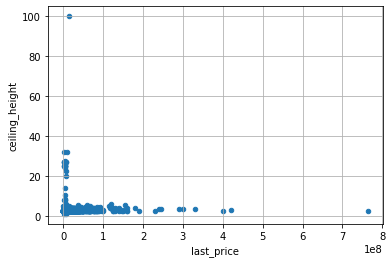

In [42]:
df.plot(x='last_price', y='ceiling_height', kind='scatter', grid=True );

Согласно открытых источников, максимальная высота потолков в Петербурге достигает 4,5 метра, в некоторых квартирах на мандсардных этажах. Можно все значения превышающие 4,5 метра отсечь так как это аномалии.

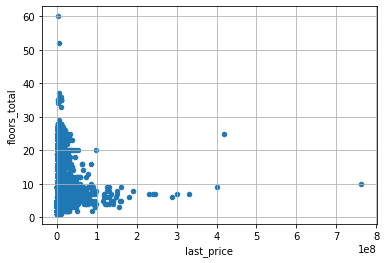

In [43]:
df.plot(x='last_price', y='floors_total', kind='scatter', grid=True );

`Кназь Александр Невский` - самый высокий жилой дом в Петербурге, его высота 126 метров и 37 этажей, 35 над землей и 2 под землей. Так что все значения `floors_total` свыше 35 можно смело удалять.

In [44]:
df = df.loc[df['total_area'] < 400] # удалим все объявления с площадью более 400 квадратных метров
df = df.loc[df['last_price'] < 2*1e8] # удалим все объявления стоимостью более 200 миллионов рублей
df = df.loc[df['rooms'] <= 8] # удалим все объявления с колличеством комнат более 10
df = df.loc[df['ceiling_height'] <= 4.5] # удалим все объявления с высотой потолков выше 4.5 метров
df = df.loc[df['floors_total'] <= 35] # удалим все объявления где этажей больше 35

In [45]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqme,weekday,month,year,living_ratio,kitchen_ratio
count,23522.000000,2.352200e+04,23522.000000,23522.000000,23522.000000,23522.000000,21663.000000,23522.000000,21307.000000,23522.000000,...,7992.000000,18026.000000,9014.000000,20372.000000,23522.000000,23522.000000,23522.000000,23522.000000,21663.000000,21307.000000
mean,9.870844,6.311170e+06,59.642082,2.059689,2.677999,10.676686,34.113740,5.875181,10.513798,0.592382,...,490.783784,0.767835,519.235412,180.740575,98913.045532,2.567851,6.403240,2017.367826,0.564837,0.187473
std,5.676974,7.368633e+06,31.617673,1.035696,0.218716,6.577446,20.270758,4.868089,5.721427,0.958954,...,341.941253,0.936941,277.866649,219.504452,45426.503171,1.788605,3.493228,1.039249,0.105247,0.072993
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,111.000000,0.000000,1.000000,2014.000000,0.020000,0.030000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,295.000000,45.000000,76562.000000,1.000000,3.000000,2017.000000,0.500000,0.130000
50%,9.000000,4.620000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.100000,0.000000,...,455.000000,1.000000,503.000000,95.000000,94960.000000,3.000000,6.000000,2017.000000,0.570000,0.170000
75%,14.000000,6.750000e+06,69.500000,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.000000,...,612.000000,1.000000,732.000000,231.000000,114090.750000,4.000000,10.000000,2018.000000,0.640000,0.230000
max,50.000000,1.908700e+08,380.000000,8.000000,4.500000,35.000000,260.000000,33.000000,107.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,995983.000000,6.000000,12.000000,2019.000000,1.000000,0.790000


Теперь данные выглядят более правдоподобно. Едем дальше.

### Факторы влияющие на стоимость квартиры.

Проверим зависимость цены квартиры от её площади:

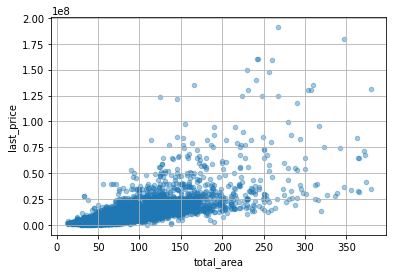

In [46]:
df.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha = 0.4);

Зависимость присутствует, но слабая. С увеличением площади стоимость квартир растет, но не прапорционально.

Проверим зависимость цены квартиры от числа комнат:

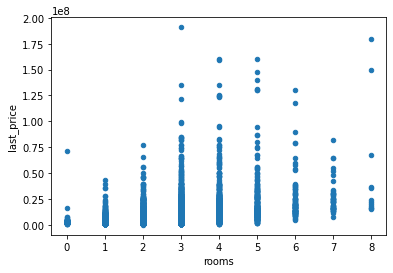

In [47]:
df.plot(x='rooms', y='last_price', kind='scatter');

С увеличением числа комнат стоимость объекта недвижимости растет, но только до 5 комнат, дальше падает. Это может быть связано с тем что на рынке присутствуют расселенные коммунальные квартиры, коих в Петербурге всё еще много, такие квартиры стоят дешевле аналогичных по площади и числу комнат, так как требуют немалых вложений.
Посмотрим на зависимость цены от удаленности от центра:

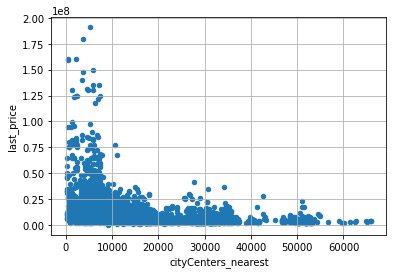

In [48]:
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True);

Тут наблюдается прямая зависимость, чем ближе к центру тем стоимость выше.

Зависимость от этажа:

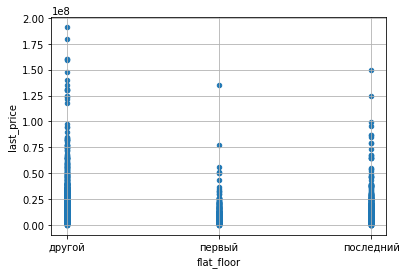

In [49]:
df.plot(x='flat_floor', y='last_price', kind='scatter', grid=True);

Нет прямой зависимости. На первом этаже квартиры стоят чуть дешевле чем на последнем, но есть некоторые квартиры расположенные на других этажах которые стоят дороже.

Посмотрим на день недели:

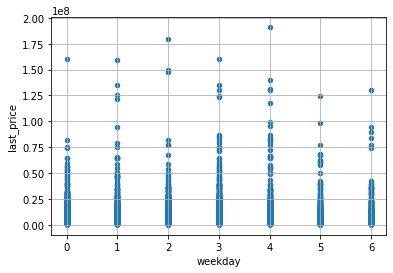

In [50]:
df.plot(x='weekday', y='last_price', kind='scatter', grid=True);

Как и ожидалось день размещения объявления не имеют влияния но стоимость квартир.

Есть ли зависимость от сезона, проверим стоимость квартир по месяцам:

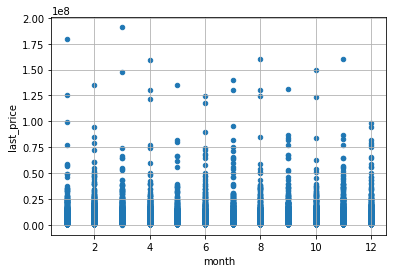

In [51]:
df.plot(x='month', y='last_price', kind='scatter', grid=True);

Как и в случае с неделями значения колеблются, но существенного влияния не оказывают.

Посмотрим что у нас по годам:

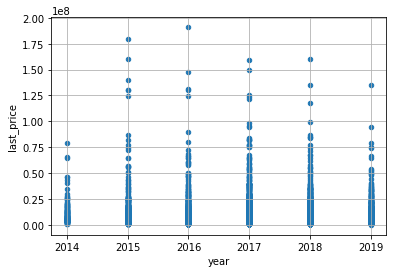

In [52]:
df.plot(x='year', y='last_price', kind='scatter', grid=True);

Существенный рост в 2015 году по отношению к 2014, далее плавный рост до 2018, а вот в 2019 году наблюдается некоторое снижение.

Подводя промежуточный вывод, можно с уверенностью сказать:

* стоимость недвижимости растет по мере приближения к центру города
* с каждым годом наблюдается рост стоимости недвижимости
* увеличение числа комнат, в большенстве случаев, ведет к увеличению стоимости квартиры
* квартиры на последнем этаже дороже тех что на первом
* сезонность и день недели не влияют на стоимость квартир в Петербурге

###  Населенные пункты с наибольшим количеством объявлений.

Выберем 10 населенных пунктов с наибольшим колличеством объявлений:

In [53]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15574
посёлок Мурино         518
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                306
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Посчитаем среднюю стоимость квадратного метра для каждого:

In [54]:
locality_price = df.pivot_table(index = 'locality_name', values = 'price_per_sqme', aggfunc=['count','mean']).astype('int')
locality_price.columns = ['count','mean']
locality_price = locality_price.sort_values('count', ascending = False).head(10)
locality_price  # без сводных таблиц никуда!

,count,mean
locality_name,,
Санкт-Петербург,15574,114179
посёлок Мурино,518,85645
посёлок Шушары,439,78550
Всеволожск,398,68654
Пушкин,369,103125
Колпино,338,75424
посёлок Парголово,327,90175
Гатчина,306,68757
деревня Кудрово,299,92473


In [55]:
locality_price[locality_price['mean']==locality_price['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15574,114179


In [56]:
locality_price[locality_price['mean']==locality_price['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141


Самая высокая средняя стоимость жилья в Санкт_Петербурге и состовляет 114179 рублей за квадратный метр, а вот самая низкая в Выборге и всего 58141 рубль за квадратный метр. Ура едем в Выборг, и опять же к Финляндии близко, можно ездить за качественными продуктами!

###  Изучим центральную часть города

У нас есть столбец `cityCenters_nearest` в котором указано расстояние до центра города в метрах, достаточно точно но неудобно, создадим столбец `cityCenters_nearest_km` в котором будет указанно растояние до центра в киллометрах.

Пропуски в столбце `cityCenters_nearest` которые мы оставили на этапе предобработки данных, теперь будут нам серьезно мешать. Сгрупперуем пропуски в столбце `cityCenters_nearest` по `locality_name` и заменим на медианное значение так как оно более устойчиво к изменениям.

In [57]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].groupby(df['locality_name']).fillna(df['cityCenters_nearest'].median()).astype('int')

Теперь добавим столбец с расстоянием до центра в киллометрах и расчитаем среднюю стоимость на каздый километр, и для наглядности построим график с изменением цен.

,price_per_sqme
cityCenters_nearest_km,
0,188313
1,152454
2,143709
3,126268
4,136266
...,...
60,56250
61,60606
62,65807


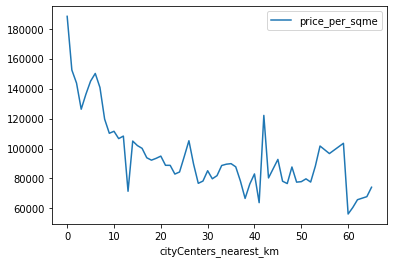

In [58]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
cityCenters_price_km = df.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_sqme', aggfunc = 'mean').astype('int')
cityCenters_price_km.plot()
cityCenters_price_km

Мы видим что на графике наблюдается падение стоимости в пределах 3 км., затем рост до 6 км. и снова падение, это может быть обусловленно самими квартирами, напомню что в центре Петербурга много коммуналок. Центральный район Петербурга в радиусе 3 км., однако с точки зрения недвижимости части районов прилегающих к Центральному тоже считаются центром (Петроградка, Адмиралтейский район, Василеостровский). Возьмем за условный центр радиус в 6 км от центра города, что не противоречит получившемуся графику.

### Анализ квартир в центре Петербурга

 Как и решиле ранее за условный центр Петербурга возбмем радиус в 6 км. от центра.

In [59]:
spb_center = df.query('cityCenters_nearest_km <= 6 and locality_name == "Санкт-Петербург"')

0.2866995541427228

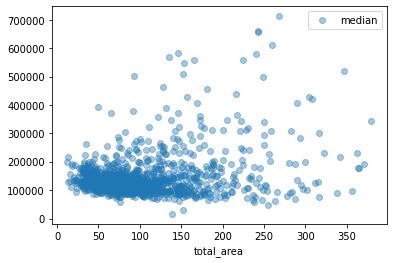

In [72]:
spb_center_area = spb_center.pivot_table(index = 'total_area', values = 'price_per_sqme', aggfunc = ['mean', 'count', 'median']).astype('int')
spb_center_area.columns = ['mean', 'count', 'median']
spb_center_area.plot(y = 'median', style = 'o', alpha = 0.4)
spb_center_area.sort_values('median', ascending = False)
df['total_area'].corr(df['price_per_sqme'])

Видно что зависимость очень слабая, всего 0.28, получается что с увеличением площади стоимость возрастает незначительно.

Сравним распределение площади среди предложений в центре и всей выборкой:

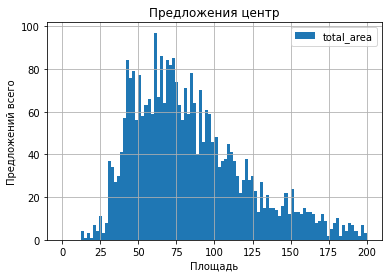

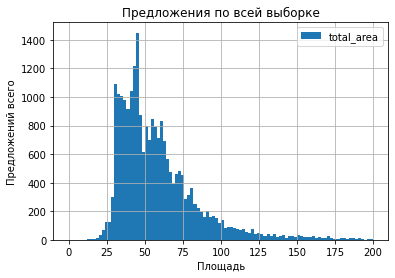

In [61]:
spb_center.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, range = (0,200));
plt.title('Предложения центр')
plt.xlabel('Площадь')
plt.ylabel('Предложений всего');
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, range = (0,200));
plt.title('Предложения по всей выборке')
plt.xlabel('Площадь')
plt.ylabel('Предложений всего');

Распределение в центре имеет более правильную форму, основная часть предложений находится в диапазоне от 25 до 100 метров. Так же заметно что доля квартир площадью более 100 метров значительно больше, в сравнении со всей выборкой.

Посмотрим как обстоят дела со стоимостью квадратного метра в центре и сравним со всей выборкой:

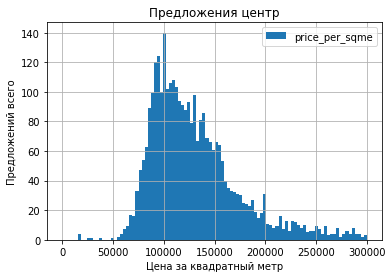

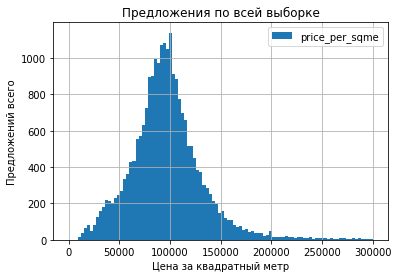

In [62]:
spb_center.plot(y = 'price_per_sqme', kind = 'hist', bins = 100, grid=True, range = (0,300000));
plt.title('Предложения центр')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Предложений всего');
df.plot(y = 'price_per_sqme', kind = 'hist', bins = 100, grid=True, range = (0,300000));
plt.title('Предложения по всей выборке')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Предложений всего');

Распределение в центре не такое правильное как во всей выборке. Предожений ниже 50000р. за квадратный метр практически нет, а вот на 100000р. за метр наблюдается пик, как и во всей выборке. Оснавная часть предложений находится в диапазоне от 90000р. до 160000р. за квадратный метр, в отличие от всей выборки где основная часть предложений в диапазоне от 50000р. до 150000р. за метр.

,mean,median
rooms,,
0,148577,137219
1,155222,143888
2,140961,126009
3,141425,116981
4,136563,108101
5,135738,102189
6,133953,100085
7,124551,108536
8,192736,100979


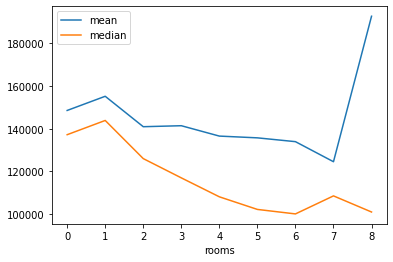

In [63]:
spb_center_rooms = spb_center.pivot_table(index = 'rooms', values = 'price_per_sqme', aggfunc = ['mean', 'median']).astype('int')
spb_center_rooms.columns = ['mean', 'median']
spb_center_rooms.plot()
spb_center_rooms

И медианное и среднее значение цены уменьшается с увеличением числа комнат, но средняя цена резко растет с 7 до 8 комнат - это можно объяснить тем что есть несколько квартир с 8 комнатами и ценой в диапазоне 150-200 миллионов рублей.

Сравним распределение числа комнат в центре и во всей выборке:

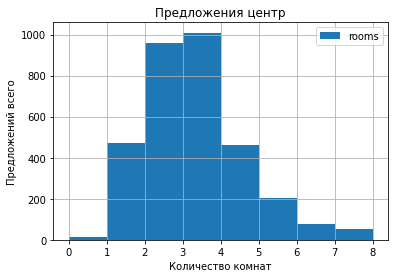

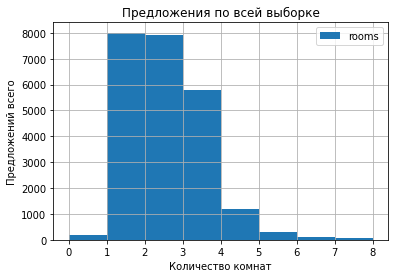

In [64]:
spb_center.plot(y = 'rooms', kind = 'hist', bins = 8, grid=True, range = (0,8));
plt.title('Предложения центр')
plt.xlabel('Количество комнат')
plt.ylabel('Предложений всего');
df.plot(y = 'rooms', kind = 'hist', bins = 8, grid=True, range = (0,8));
plt.title('Предложения по всей выборке')
plt.xlabel('Количество комнат')
plt.ylabel('Предложений всего');

Итак что мы видим: мы видим что 2 и 3 комнатных квартир в центре больше чем остальных, в отличии от всей выборки, где болше всего предложений 1 и 2 комнатных квартир; распределение имеет более правильную форму, хотя и скошено в право.

Проверим влияние этажа на котором расположена квартира на стоимость метра:

,mean,median
flat_floor,,
другой,147351,127551
первый,122493,109457
последний,133322,115789


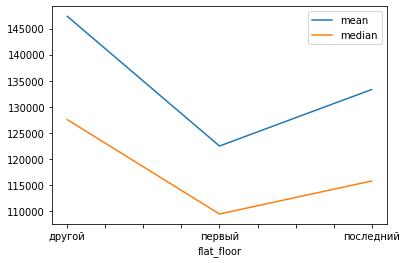

In [65]:
spb_center_floor = spb_center.pivot_table(index = 'flat_floor', values = 'price_per_sqme', aggfunc = ['mean', 'median']).astype('int')
spb_center_floor.columns = ['mean', 'median']
spb_center_floor.plot()
spb_center_floor

Предложения на первом этаже дешевле чем на всех остальных, неудивительно ведь в центре многолюдно и моло кому хочется чтобы в его квартиру постоянно смотрела множество людей гуляющих в центре.

Посмотрим на удаленность от центра.

,mean,median
cityCenters_nearest_km,,
0,188313,139318
1,152500,123728
2,143709,116158
3,126291,110180
4,136589,125918
5,145131,125723
6,150155,133807


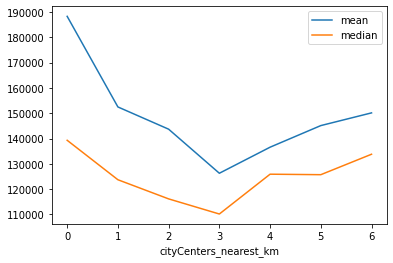

In [66]:
spb_center_nearest = spb_center.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_sqme', aggfunc = ['mean', 'median']).astype('int')
spb_center_nearest.columns = ['mean', 'median']
spb_center_nearest.plot()
spb_center_nearest

С увеличением расстояния подает и цена, наблюдается коррекция после 3 км. Отличия от общего графика не наблюдается.
Посмотрим влияние высоты потолка:

,mean,median
ceiling_height,,
2.4,101254,101254
2.5,127286,120215
2.6,141552,124274
2.7,130705,127744
2.8,132937,125196


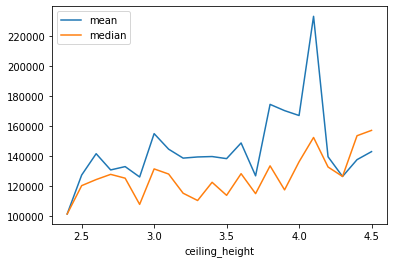

In [67]:
spb_center_ceiling_height = spb_center.pivot_table(index = 'ceiling_height', values = 'price_per_sqme', aggfunc = ['mean', 'median']).astype('int')
spb_center_ceiling_height.columns = ['mean', 'median']
spb_center_ceiling_height.plot()
spb_center_ceiling_height.head()

Видно что с увеличением потолка стоимость квадратного метра растет. В центре много дворцов а там с высотой потолков полный порядок, ну и цена соответствует.


Сравним высоту потолков в центре и во всей выборке:

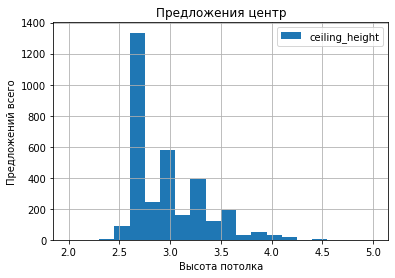

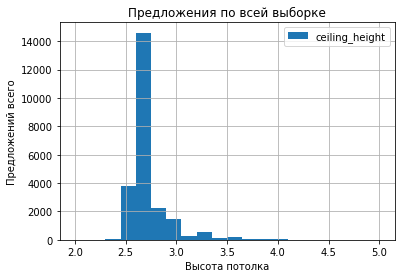

In [68]:
spb_center.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, range = (2,5));
plt.title('Предложения центр')
plt.xlabel('Высота потолка')
plt.ylabel('Предложений всего');
df.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, range = (2,5));
plt.title('Предложения по всей выборке')
plt.xlabel('Высота потолка')
plt.ylabel('Предложений всего');

Пик на 2.7м. как и во всей выборке(влияние заполнения пропусков плюс стандарты строительства современного жилья). Так же заметно большее влияние на выборку предложений с высотой потолка 3 метра и выше. Пики на 3, 3.3 и 3.5 мерта (видимо в прошлом тоже придерживались неких стандартов, касательно высоты потолка). 

Посмотрим как влияет на стоимость жилья в цетре день недели, месяцы и годы:

,mean,median
weekday,,
0,141340,126133
1,139713,118103
2,139242,124394
3,144563,120578
4,143368,125231
5,143271,128431
6,144842,125482


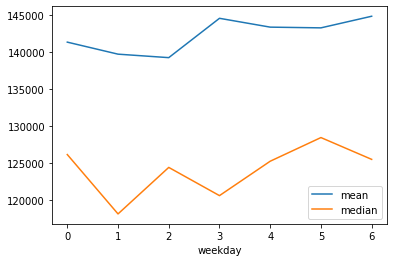

In [69]:
spb_center_weekday = spb_center.pivot_table(index = 'weekday', values = 'price_per_sqme', aggfunc = ['mean', 'median']).astype('int')
spb_center_weekday.columns = ['mean', 'median']
spb_center_weekday.plot()
spb_center_weekday

Если хотите приобрести жилье в центре Петербурга, лучшие дни для сделок вторник и четверг!

,mean,median
month,,
1,147778,129334
2,142314,121151
3,143299,130333
4,145764,127016
5,133215,121580
6,135057,116872
7,139287,118291
8,145941,125000
9,140230,124051


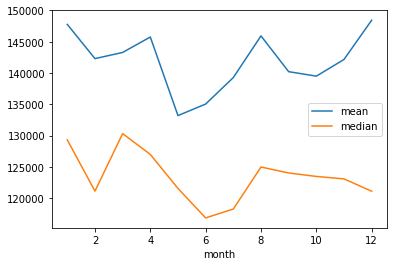

In [70]:
spb_center_month = spb_center.pivot_table(index = 'month', values = 'price_per_sqme', aggfunc = ['mean', 'median']).astype('int')
spb_center_month.columns = ['mean', 'median']
spb_center_month.plot()
spb_center_month

Летом самые выгодные предложения за весь год! Неудивительно лето в Петербурге побуждает людей к миграции в теплые края. Особенно если вы живете в центре.

,mean,median
year,,
2014,195653,143465
2015,147189,119289
2016,135792,115178
2017,139288,120781
2018,139042,125000
2019,159095,136363


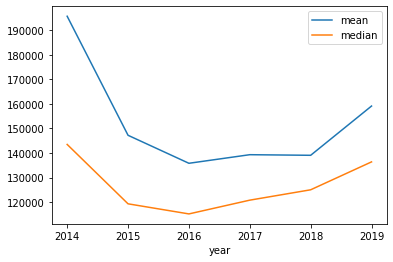

In [71]:
spb_center_year = spb_center.pivot_table(index = 'year', values = 'price_per_sqme', aggfunc = ['mean', 'median']).astype('int')
spb_center_year.columns = ['mean', 'median']
spb_center_year.plot()
spb_center_year

Наблюдается серьезное падение стоимости с 2014 года по 2016. С 2016 года наблюдается рост и стоимость квадратного метра почти отиграла подение предыдущих лет.

В целом ситуация в центре Петербурга отличается от остальных районов и пригорода. Так увеличение числа комнат ведет не к росту а к падению стоимости. Наблюдается некоторая сезонность, и разница в стоимости жилья от дня недели. Наблюдается более сильное влияние на стоимость жилья в зависимости от этажа. И в отличие от других районов Петербурга площадь квартиры не является решающим фактором в ценообразовании, лишь незначительно влияя на конечную стоимость.

## Общий вывод

Нами проделана большая работа. Мы обработали имеющиеся у нас данные. Провели анализ, заменили пропущенные значения. Расчитана стоимость квадратного метра. Добавлены столбцы с днем, месяцем и годом объявления. Квартиры разделены по этажности, удаленности от центра. Посчитано соотношение жилой площади к общей. Проведен исследовательский анализ, построены графики и гистограммы.

В ходе выполнения роботы получились следующие выводы: 

* Самая дорогая недвижимость находится в центре города
* С 2016 года наблюдается восстановительный рост стоимости недвижимости
* Параметры объекта недвижимости существенно влияют на стоимость (высота потолка, площадь, число комнат и т.д.)
* в центре города, в отличии от окраин и пригорода, наблюдается сезонность в стоимости квадратного метра
* Увеличение площади квартир в центре слабо влияет на увеличение стоимости квадратного метра
* доля квартир площадью свыше 75кв.м. в центре больше чем во всей выборке
* стоимость квадратного метра в центре выше чем во всей выборке, как и ожидалось 
* в центре доля 2 и 3 комнатных квартир больше чем в выборке 
* доля квартир с высокими потолками в цетре больше

Так же в ходе исстледования были обнаруженны аномалии во времени размещения объявлений на 7, 30, 45, 60 и 90 днях. С данной проблемой не получилось разобраться. Я проверил и условия размещения (есть некоторые подозрения на условия, только подходящие цифры не относятся к Москве и Петербургу) и посмотрел на данные по конкретным дням. Зависимости обнаружить не удалось. Если бы была возможность обратится к сотрудникам подготавливавшим данные, я думаю нам бы удалось установить истину.

В целом более подробные выводы сделать нельзя. Для более детального анализа не достаточно оперировать средними значениями. Но в дальнейшем при получении знаний подобный анализ, я думаю, будет более детальный и наглядный.